In [1]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [8]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
bandung=pd.read_csv('bandung.csv')

In [9]:
# Tipe Datanya : DataFrame (df)
print(type(bandung))
# Ukuran Data
N, P = bandung.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 100, ', Kolom = ', 18)

In [10]:
# "Mengintip" beberapa data pertamanya
bandung.head(7)

,No,Tgl_Iklan,URL,Harga,Kota,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi,Unnamed: 17
0,1,04-05-2021,https://www.rumah123.com/properti/bandung/hos8...,1095000000,Bandung,78,65,3,2,0,0,0,0,1300,SHM,10mnt Bandara Husein Pajajaran Rumah Tanpa Ban...,"""Membeli rumah bukan hanya sekedar tempat ting...",NaN
1,2,04-05-2021,https://www.rumah123.com/properti/bandung/hos8...,379000000,Bandung,82,43,2,1,0,0,1,0,1300,SHM,9mnt Exit Tol cileunyi Rumah Cocok Investasi d...,Apakah Anda menginginkan hunian dalam cluster ...,NaN
2,3,04-05-2021,https://www.rumah123.com/properti/bandung/hos8...,1400000000,Bandung,115,126,3,2,0,0,0,0,1300,SHM,PROMO Rumah cluster diskon 7mnt KPAD gegerkalo...,Rumah Sejuk idaman di dekat Setiabudi Sarijadi...,NaN
3,4,04-05-2021,https://www.rumah123.com/properti/bandung/hos8...,379000000,Bandung,80,45,2,1,0,0,1,0,1300,SHM,rumah strategis dkt kawasan kampus jatinangor ...,Apakah Anda menginginkan hunian dalam cluster ...,NaN
4,5,04-05-2021,https://www.rumah123.com/properti/bandung/hos8...,3900000000,Bandung,160,250,3,3,0,0,2,0,3300,SHM,Rumah Untuk Usaha 2Lt di Antapani Lokasi Strat...,Rumah Untuk Usaha Terawat Siap Huni\n Antapani...,NaN
5,6,04-05-2021,https://www.rumah123.com/properti/bandung/hos8...,955000000,Bandung,125,60,2,2,0,0,0,0,1300,SHM,Rumah Perumahan Tenang dan Nyaman 15 menit UPI...,Rumah Rasa Villa idaman di Lembang dekat Geger...,NaN
6,7,04-05-2021,https://www.rumah123.com/properti/bandung/hos8...,845000000,Bandung,125,42,2,1,0,0,0,0,1300,SHM,Rumah cluster kuldesak islami di lembang 10mni...,Rumah Rasa Villa idaman di Lembang dekat Geger...,NaN


In [11]:
# "Mengintip" beberapa data akhirnya
bandung.tail(9)

,No,Tgl_Iklan,URL,Harga,Kota,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi,Unnamed: 17
91,92,04-08-2021,https://rumahdijual.com/8166196,700000000,Bandung,95,67,3,2,0,0,0,1,1300,SHM,rumah 2 lantai dijual di bandung timur paling ...,ayo dapatkan segera perumahan mewah dengan har...,NaN
92,93,04-05-2021,https://rumahdijual.com/9840963,1400000000,Bandung,277,300,6,5,0,0,2,0,2200,SHM,Dijual Murah Rumah Kolam Renang Di Cibiru Atas...,Dijual Murah Rumah Cantik Lux Minimalis Dengan...,NaN
93,94,04-07-2021,https://rumahdijual.com/10459189,1800000000,Bandung,117,150,4,4,0,0,3,0,2200,SHM,Dijual Rumah Di Komplek Cigadung bandung,Rumah di komplek kawasan Dago Cigadung Bandung...,NaN
94,95,04-07-2021,https://rumahdijual.com/7196924,2250000000,Bandung,177,350,4,4,0,0,2,2,13300,SHM,Dijual Murah Rumah Ruko di Cicadas Bandung !!!,DIJUAL MURAH RUMAH / RUKO TEMPAT USAHA DI CICA...,NaN
95,96,04-07-2021,https://rumahdijual.com/8997133,2500000000,Bandung,197,150,4,3,0,0,4,0,2200,SHM,Rumah Siap Huni Di Nanjung Cimahi Dalam komple...,Rumah siap huni aman nyaman di Nanjung Cimahi\...,NaN
96,97,04-08-2021,https://rumahdijual.com/10461158,547123456,Bandung,65,36,2,1,0,0,1,0,1300,SHM,Rumah Murah Modern Dan Unik di Cijerah Gempol,Rumah Murah Modern Dan Unik di Cijerah Gempol\...,NaN
97,98,04-08-2021,https://rumahdijual.com/10461087,650040000,Bandung,55,40,3,2,0,0,0,0,1300,SHM,Rumah dilokasi Strategis di Cibabat Cimahi | CIC5,Kode Iklan CIC5\n \n Rumah Dijual di Cimahi Ba...,NaN
98,99,04-08-2021,https://rumahdijual.com/8378559,362000000,Bandung,60,30,3,1,0,0,0,1,1300,SHM,* PROMO NEW NORMAL *Rumah Syariah Strategis Mu...,Bismillahirrahmanirrahim...\n \n * PROMO MAR...,NaN
99,100,04-08-2021,https://rumahdijual.com/10461196,650060000,Bandung,55,40,3,2,0,0,0,0,1300,"SHM ,IMB",Rumah 2 lantai dengan harga minimalis di Cimah...,Kode Iklan CIC7\n\nRumah Dijual di Cimahi Band...,NaN


In [12]:
# chosen at random
bandung.sample(10)

,No,Tgl_Iklan,URL,Harga,Kota,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi,Unnamed: 17
85,86,04-07-2021,https://rumahdijual.com/10459193,260000000,Bandung,66,42,2,1,0,0,1,0,1300,SHM,Rumah Murah Spek Mewah Strategis Legalitas Ama...,"Rumah paku haji harga 260 juta, indent 3 sampa...",NaN
34,35,04-05-2021,https://www.rumah123.com/properti/bandung/hos8...,2600000000,Bandung,238,150,3,1,0,0,0,0,1300,SHM,"Rumah Terawat di Area Antapani, Lingkungan Ama...","Rumah Terawat siap huni, Good Loc, Bentuk Tana...",NaN
13,14,04-05-2021,https://www.rumah123.com/properti/bandung/hos8...,4075000000,Bandung,277,350,7,5,0,0,4,1,1300,SHM,SYARIAH Rumah Mewah Readystock Sejuk Tenang di...,Rumah Rasa Villa idaman di Lembang dekat Geger...,NaN
23,24,04-05-2021,https://www.rumah123.com/properti/bandung/hos8...,130000000,Bandung,40,35,2,1,0,0,0,0,900,SHM,Rumah Minimalis Murah Full Spek Modern Lokasi ...,"Perumahan Bumi Agnes Nanjung, Rumah modern sia...",NaN
56,57,04-05-2021,https://www.rumah123.com/properti/bandung/hos8...,665000000,Bandung,95,53,2,2,0,0,0,0,1300,SHM,hunian asri di lembang parongpong cisarua 30mn...,Rumah Villa idaman Sejuk di Lembang dekat Patr...,
76,77,04-07-2021,https://rumahdijual.com/10022638,8000000000,Bandung,227,325,6,4,0,0,2,0,4400,SHM,RUMAH SECOND SEKEN DI PASTEUR SUKAMULYA BANDUNG,"Rumah Tinggal dekat Exit Tol Pasteur, :Jln. Te...",NaN
70,71,04-07-2021,https://rumahdijual.com/8636672,3250000000,Bandung,210,300,4,3,1,1,1,1,4400,SHM,"208. RUMAH LUX 2 LANTAI DI MEGARAYA, PASTEUR B...","Dijual Rumah LUX di Megaraya, Pasteur Bandung\...",NaN
45,46,04-05-2021,https://www.rumah123.com/properti/bandung/hos8...,1400000000,Bandung,118,123,3,2,0,0,0,0,1300,SHM,PROMO 16mnt RSHS pasteur strategis cluster di ...,Rumah Sejuk idaman di dekat Setiabudi Sarijadi...,
89,90,04-07-2021,https://rumahdijual.com/4936422,1388000000,Bandung,98,84,3,3,0,0,0,0,2200,SHM,Type Baru di CLUSTER ALINDA @ PRAMESTHA RESORT...,New Type CLUSTER ALINDA @ PRAMESTHA RESORT TOW...,NaN
86,87,04-11-2021,https://rumahdijual.com/7188453,375000000,Bandung,72,38,2,1,0,0,1,0,1300,"SHM, IMB, PBB","Rumah Murah, Bandung dekat Cimahi, Mekarsari E...",Dijual Rumah Murah Baru Minimalis 300jtan Band...,NaN


# Removing a variable(s)

In [13]:
# perhatikan perintahnya tidak menggunakan tanda "()" ==> Properties 
bandung.columns

Index(['No', 'Tgl_Iklan', 'URL', 'Harga', 'Kota', 'LT', 'LB', 'KT', 'KM',
       'KTP', 'KMP', 'Carport', 'Garasi', 'Listrik', 'Surat', 'Judul',
       'Deskripsi', 'Unnamed: 17'],
      dtype='object')

# Mengoreksi Tipe variabel

In [20]:
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
# Perhatikan df sebagaimana semua variable di Python diperlakukan seperti object
bandung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
Harga          100 non-null int64
LT             100 non-null int64
LB             100 non-null int64
KT             100 non-null int64
KM             100 non-null int64
KTP            100 non-null int64
KMP            100 non-null int64
Carport        100 non-null int64
Garasi         100 non-null int64
Listrik        100 non-null int64
Surat          100 non-null object
Judul          100 non-null object
Deskripsi      100 non-null object
Unnamed: 17    21 non-null object
dtypes: int64(10), object(4)
memory usage: 11.0+ KB


In [21]:
# Merubah tipe data "jika" tidak tepat, contoh:
bandung.dtypes

Harga           int64
LT              int64
LB              int64
KT              int64
KM              int64
KTP             int64
KMP             int64
Carport         int64
Garasi          int64
Listrik         int64
Surat          object
Judul          object
Deskripsi      object
Unnamed: 17    object
dtype: object

In [23]:
#mengecek apakah ada duplikat data?
print(bandung.shape)
bandung.duplicated().sum()

(100, 14)


0

# Variable Selection

In [24]:
# Memilih hanya variable dengan tipe tertentu
bandung_num = bandung.select_dtypes(include = ['float64', 'int64'])
bandung_num.head()
# Perhatikan price_num adalah variable df baru! ... (hati-hati di data yang besar)

,Harga,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik
0,1095000000,78,65,3,2,0,0,0,0,1300
1,379000000,82,43,2,1,0,0,1,0,1300
2,1400000000,115,126,3,2,0,0,0,0,1300
3,379000000,80,45,2,1,0,0,1,0,1300
4,3900000000,160,250,3,3,0,0,2,0,3300


# Dasar Pengolahan variabel Kategorik: Dummy Variable

In [41]:
df = pd.get_dummies(bandung['Harga'], prefix='LT')
df.head()

,LT_130000000,LT_140000000,LT_165000000,LT_260000000,LT_350000000,LT_353000000,LT_361000000,LT_362000000,LT_366000000,LT_367000000,...,LT_3100000000,LT_3250000000,LT_3300000000,LT_3500000000,LT_3550000000,LT_3900000000,LT_4075000000,LT_7000000000,LT_7500000000,LT_8000000000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Menggabungkan dengan data awal (concat)

In [42]:
df2 = pd.concat([bandung, df], axis = 1)
df2.head().transpose()

,0,1,2,3,4
Harga,1095000000,379000000,1400000000,379000000,3900000000
LT,78,82,115,80,160
LB,65,43,126,45,250
KT,3,2,3,2,3
KM,2,1,2,1,3
KTP,0,0,0,0,0
KMP,0,0,0,0,0
Carport,0,1,0,1,2
Garasi,0,0,0,0,0
Listrik,1300,1300,1300,1300,3300


# Memilih Data Secara Manual

## Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe Luas Tanah?

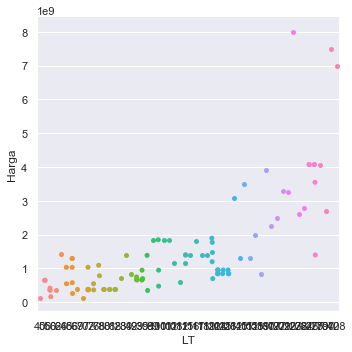

In [43]:
p= sns.catplot(x="LT", y="Harga", data=bandung)
# Apa yang bisa dilihat dari hasil ini?

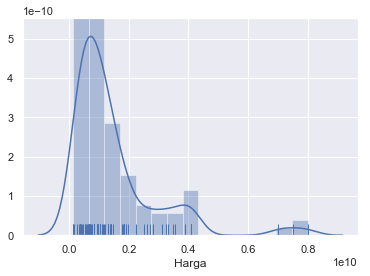

In [45]:
# Distributions
p = sns.distplot(bandung['Harga'], kde=True, rug=True)

In [47]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "harga"

df = np.abs(bandung.Harga - bandung.Harga.mean())<=(2*bandung.Harga.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(100,)


0    True
1    True
2    True
3    True
4    True
Name: Harga, dtype: bool

In [49]:
bandung2 = bandung[df] # Data tanpa outliers
print(bandung2.shape, bandung.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "Price2"
# Jika datanya besar hati-hati melakukan hal ini

(97, 14) (100, 14)


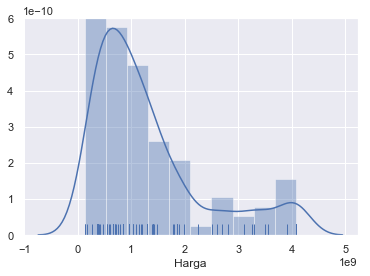

In [50]:
# Distributions
p = sns.distplot(bandung2['Harga'], kde=True, rug=True)

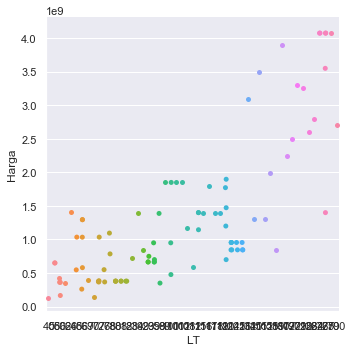

In [51]:
p= sns.catplot(x="LT", y="Harga", data=bandung2)
# Apa yang bisa dilihat dari hasil ini?

# Missing Values

In [52]:
# General Look at the Missing Values
print(bandung2.isnull().sum())

Harga           0
LT              0
LB              0
KT              0
KM              0
KTP             0
KMP             0
Carport         0
Garasi          0
Listrik         0
Surat           0
Judul           0
Deskripsi       0
Unnamed: 17    76
dtype: int64


In [54]:
set(bandung2['LT'])

{40,
 55,
 60,
 62,
 64,
 65,
 66,
 69,
 70,
 72,
 76,
 78,
 80,
 81,
 82,
 83,
 84,
 92,
 93,
 95,
 98,
 99,
 100,
 101,
 102,
 108,
 112,
 115,
 116,
 117,
 118,
 119,
 120,
 124,
 125,
 126,
 132,
 140,
 151,
 152,
 158,
 159,
 160,
 177,
 197,
 209,
 210,
 238,
 264,
 276,
 277,
 279,
 500}

# Gambaran yang Lebih baik tentang MV terutama di Big Data

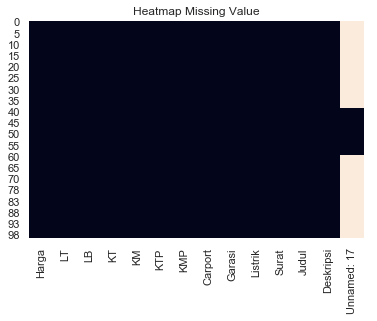

In [55]:
sns.heatmap(bandung2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [56]:
(bandung2.isnull().sum()/len(price2)).to_frame('persentase missing')

,persentase missing
Harga,0.000000
LT,0.000000
LB,0.000000
KT,0.000000
KM,0.000000
KTP,0.000000
KMP,0.000000
Carport,0.000000
Garasi,0.000000
Listrik,0.000000


In [58]:
print(bandung2.isnull().sum())

Harga           0
LT              0
LB              0
KT              0
KM              0
KTP             0
KMP             0
Carport         0
Garasi          0
Listrik         0
Surat           0
Judul           0
Deskripsi       0
Unnamed: 17    76
dtype: int64


# Statistika Deskriptif

In [ ]:
bandung2.describe()

In [59]:
# Statistika Sederhana dari data "Numerik"-nya
bandung2.describe(include='all')

,Harga,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi,Unnamed: 17
count,9.700000e+01,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97,97,97,21
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,97,77,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHM,Kompleks Eldorado Bandung Rumah Siap Huni,Rumah Rasa Villa idaman di Lembang dekat Geger...,
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,1,5,21
mean,1.299753e+09,120.969072,105.206186,2.979381,2.051546,0.051546,0.030928,0.731959,0.164948,1712.371134,NaN,NaN,NaN,NaN
std,1.056045e+09,71.218773,97.351483,1.290828,1.130737,0.222258,0.174022,1.104116,0.425255,1417.543190,NaN,NaN,NaN,NaN
min,1.300000e+08,40.000000,27.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,900.000000,NaN,NaN,NaN,NaN
25%,5.500000e+08,76.000000,45.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,NaN,NaN,NaN,NaN
50%,9.550000e+08,100.000000,64.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,NaN,NaN,NaN,NaN
75%,1.473000e+09,125.000000,123.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1300.000000,NaN,NaN,NaN,NaN


In [60]:
# ini adalah parameter tambahan jika kita juga ingin mendapatkan statistik sederhana seluruh datanya
# (termasuk data kategorik)
bandung[['Judul','Deskripsi']].describe(include='all')

,Judul,Deskripsi
count,100,100
unique,100,80
top,21mntUnivMuhammadiyah Soekarno Hatta Panyileuk...,Rumah Rasa Villa idaman di Lembang dekat Geger...
freq,1,5


# Distribusi nilai pada setiap variabel kategorik

In [61]:
# get all unique values of a variable/column
for col in bandung_cat.columns:
    print(col,': ', set(bandung[col].unique()))

In [62]:
bandung['Judul'].unique()

array(['10mnt Bandara Husein Pajajaran Rumah Tanpa Bank di Cicendo Pasteur',
       '9mnt Exit Tol cileunyi Rumah Cocok Investasi di rancaekek jatinangor',
       'PROMO Rumah cluster diskon 7mnt KPAD gegerkalong setiabudi di ciwaruga',
       'rumah strategis dkt kawasan kampus jatinangor di rancaekek Cileunyi',
       'Rumah Untuk Usaha 2Lt di Antapani Lokasi Strategis',
       'Rumah Perumahan Tenang dan Nyaman 15 menit UPI Setiabudi Lembang',
       'Rumah cluster kuldesak islami di lembang 10mnit Setiabudi regency',
       'Rumah 6mnt RSHarapanKeluarga Cipacing Jatinangor di Rancaekek Cileunyi',
       'PROMO Rumah 2 lantai elegan dkat UPI setiabudi gegerkalong di ciwaruga',
       'Rumah cluster tenang islami di lembang 12mnit pondok hijau gegerkalong',
       'PROMO Villa Cantik di Lembang 20mnt Setiabudi Gegerkalong Cihanjuang',
       'PROMO 10mnt Unpad Dipati Ukur Rumah minimalis di sayap dago cigadung',
       'rumah perumahan tenang dan nyaman di lembang 20mnt ciwaruga paro

In [63]:
# price
# Jika yang dibutuhkan memang hanya nama kolom, maka kita bisa melakukan hal ini untuk menghemat penggunaan memory
numVar = bandung.select_dtypes(include = ['float64', 'int64']).columns
list(numVar)

['Harga', 'LT', 'LB', 'KT', 'KM', 'KTP', 'KMP', 'Carport', 'Garasi', 'Listrik']

In [64]:
# Distribusi tiap data
bandung['Judul'].value_counts()
# kita bisa juga visualisasikan informasi ini

21mntUnivMuhammadiyah Soekarno Hatta Panyileukan Rumah di Rancaekek                            1
Rumah dkt wisata di lembang villa istana bunga parongpong cihanjuang                           1
rumah di bandung selatan bebas banjir full spek one gate system KPR bisa di bantu              1
AMAN BETAH Rumah Mewah Readystock Sejuk Tenang Lembang dkt Setiabudi                           1
9mnt Exit Tol cileunyi Rumah Cocok Investasi di rancaekek jatinangor                           1
Rumah dilokasi Strategis di Cibabat Cimahi | CIC5                                              1
JUAL RUMAH MEWAH + KOLAM RENANG DI DAGO RESORT BANDUNG                                         1
Hunian Nyaman Modern Cocok Untuk Investasi View Alam di Cimahi                                 1
Dijual Murah Rumah Ruko di Cicadas Bandung !!!                                                 1
10mnt EcoPesantren Aa Gym Cigugur Girang Rumah di Gegerkalong Ciwaruga                         1
PROMO 10mnt Unpad Dipati Ukur 

# Two-Way Tables (contingency tables)

In [66]:
CT = pd.crosstab(index=bandung2["Deskripsi"], columns=bandung2["Judul"])
CT

Judul,* PROMO NEW NORMAL *Rumah Syariah Strategis Murah Mewah Dp Bisa Ccl 18x,10mnt Bandara Husein Pajajaran Rumah Tanpa Bank di Cicendo Pasteur,10mnt EcoPesantren Aa Gym Cigugur Girang Rumah di Gegerkalong Ciwaruga,10mnt Masjid Salman ITB Dago Rumah Desain Jepang Best View di Cigadung,11mnt Samsat Pajajaran Rumah Konsep Syariah di Cicendo Pasteur,13 mnt RSHS Rumah Strategis cluster Kuldesak di Pasteur Cicendo,13mnt RSHS Rumah Strategis cluster Kuldesak di Pasteur Cicendo,2.5KM Borma Dakota Rumah Baru Mewah SHM di Cluster Pasteur Cicendo,"208. RUMAH LUX 2 LANTAI DI MEGARAYA, PASTEUR BANDUNG",21mntUnivMuhammadiyah Soekarno Hatta Panyileukan Rumah di Rancaekek,...,SHM IMB Rumah Mewah Readystock Sejuk Tenang di Lembang dekat Setiabudi,SYARIAH Rumah Mewah Readystock Sejuk Tenang di Lembang dkt Setiabudi,Type Baru di CLUSTER ALINDA @ PRAMESTHA RESORT TOWN Dago BANDUNG Utara.............,"VALLE VERDE, Premium And Exclusive Villa & Residences dii Cisaru Bandung",hunian asri di lembang parongpong cisarua 30mnt padalarang cimahi,promo bahagia rumah di lembang dkt cisarua parongpong cimahi cihideung,rumah 2 lantai dijual di bandung timur paling murah smart home cipadung,rumah di bandung selatan bebas banjir full spek one gate system KPR bisa di bantu,rumah perumahan tenang dan nyaman di lembang 20mnt ciwaruga parongpong,rumah strategis dkt kawasan kampus jatinangor di rancaekek Cileunyi
Deskripsi,,,,,,,,,,,,,,,,,,,,,
"""Membeli rumah bukan hanya sekedar tempat tinggal. Akad-akad pembelian rumah juga harus\ndiperhatikan, Tanpa Denda, Tanpa Sita, dan Tanpa Bunga Bank. Insya Allah berkah.\n\nCluster terbaru di Kotamadya Bandung, Aulia Pasteur Harmoni.\nCluster kuldesak dengan konsep customized design. Sudah include jasa arsitek dan konstruksi.\n\nAkses sangat strategis:\n- 3.8KM ke gerbang tol pasteur\n- 750m ke Stasiun Cimindi\n- Seberang SMKN 11 Kota Bandung\n- 1.2KM Gateway Pasteur\n- 1.6KM SMAN 13 Kota Bandung Andir\n- 10 menit Bandara Husein Sastranegara\n- 4.8KM RS Hermina Pasteur\n- 4.4KM Kampus Maranatha\n- 16 menit Kampus ITB Ganesha Dago\n- 12 menit Istana Plaza Pasir Kaliki\n- 2.5KM Borma Dakota Pasteur\n- 11 menit RS Kebon Jati Andir\n- 13 menit RSHS Kota Bandung\n\nProyek perdana, harga perdana\nAda penawaran khusus untuk Anda diantaranya:\n- bonus kitchen set\n- bonus taman depan dan belakang\n- dan bonus lainnya yang akan sampaikan, jika Bapak/Ibu mengontak saya\nsekarang juga\n\nkontak saya sekarang\nbpk Cocok Properti\n0812-1874-3006 WA""",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Apakah Anda menginginkan hunian dalam cluster yang strategis?\n Akses langsung ke jalan utama dan dekat tol?\n \n Zanjabil Town House\n Berlokasi di pusat perkembangan bandung timur. Konsep cluster one gate system dengan keamanan 24 jam non stop.\n \n FREE desain, jasa arsitek gratis\n \n Spesifikasi\n tipe 45\n luas tanah 83m2\n 2 kamar tidur\n 1 kamar mandi\n ruang tamu\n ruang keluarga\n dapur\n teras\n carport mobil\n halaman depan dan belakang\n \n Bagaimana akses lokasinya?\n - 2 menit ke Borma Rancaekek\n - 5 menit dari PT Garuda Food Rancaekek\n - 7 menit dari Brimob Jabar, Sayang, Jatinangor\n - 9 menit dari exit tol cileunyi\n - 11 menit dari PT Wings food cileunyi\n - 12 menit dari kampus Unpad Jatinangor\n - 12 menit dari kampus ITB jatinangor\n - 14 menit dari Jatinangor Town Square\n \n Skema pembayaran\n - cash\n - cash betahap 1 tahun\n - kpr syariah ke developer maksimal 5 tahun\n \n Tersedia juga tipe lainnya dan tanah kavling siap bangun\n \n segera kontak admin\n Bpk Cocok Properti (0812-1874-3006)\n nomor WA tertera",0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
"Apakah Anda menginginkan hunian dalam cluster yang strategis?\n Akses langsung ke jalan utama dan dekat tol?\n \n Zanjabil Town House\n Berlokasi di pusat perkembangan bandung timur. Konsep cluster one gate system dengan keamanan 24 jam non stop.\n \n FREE desain, jasa arsitek gratis\n \n Spesifikasi\n tipe 45\n luas tanah 83m2\n 2 kamar tidur\n 1 kamar mandi\n ruan

# Data Grouping

In [67]:
# Slicing DataFrame - Just like query in SQL
bandung2[bandung2["Deskripsi"] == "CAT B"].describe()
# Bisa ditambahkan .drop("Parking", axis=1) untuk menghilangkan kolom dengan single value

,Harga,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Saving (preprocessed) Data

In [76]:
# Saving the preprocessed Data for future use/analysis
bandung2.to_csv("C:/Users/User/Documents/datmin/bandung.csv", encoding='utf8')

# Tambah dimensi di Visualisasi untuk melihat insight yang lebih jelas/baik 

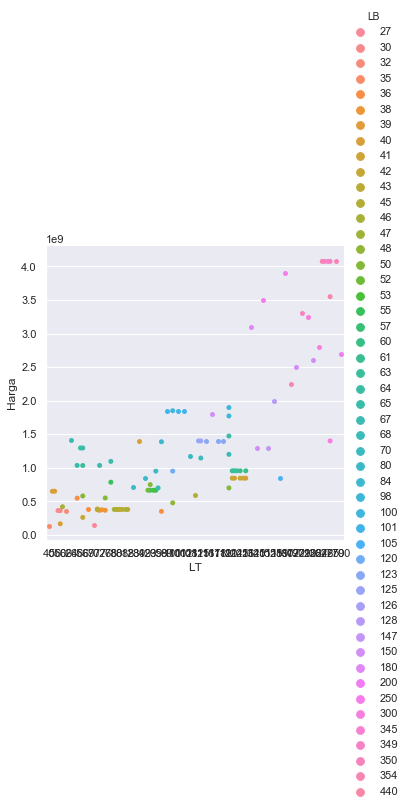

In [79]:
# Bisa juga plot dengan informasi dari 3 variabel sekaligus
# (untuk melihat kemungkinan faktor interaksi)
p= sns.catplot(x="LT", y="Harga", hue="LB", kind="swarm", data=bandung2)

# Ada informasi apakah dari hasil diatas?

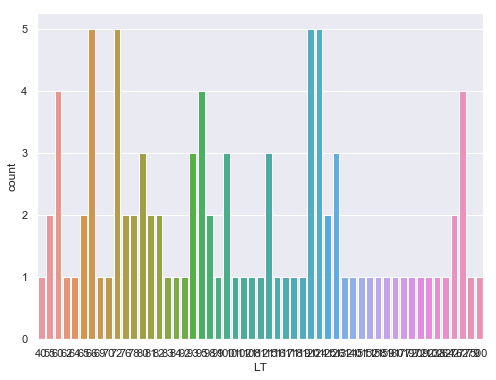

In [80]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="LT", data=bandung2)

# Stacked/Segmented Chart

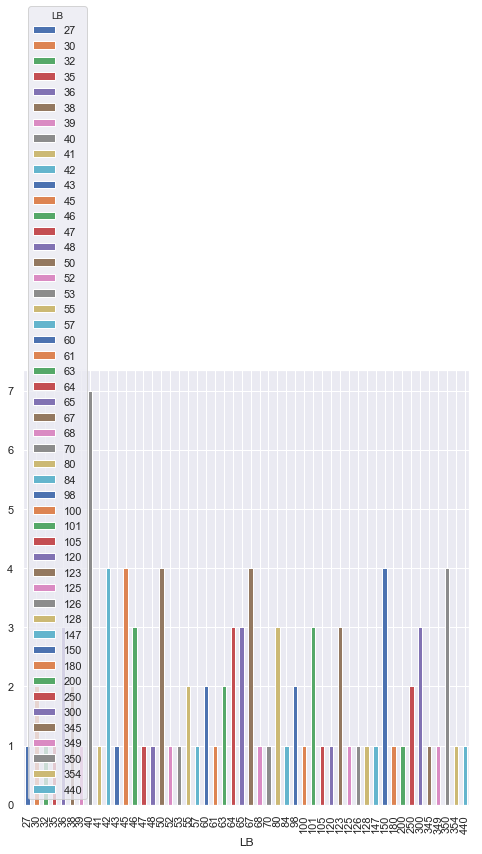

In [92]:
CT = pd.crosstab(index=bandung2["LB"], columns=bandung2["LB"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

In [94]:
# ini dilakukan jika kita ingin menyimpan plotnya ke dalam suatu file
p.figure.savefig('barChart.png')
# lihat di folder ipynb-nya akan muncul file baru.

# Boxplot dapat juga dipisahkan berdasarkan suatu kategori

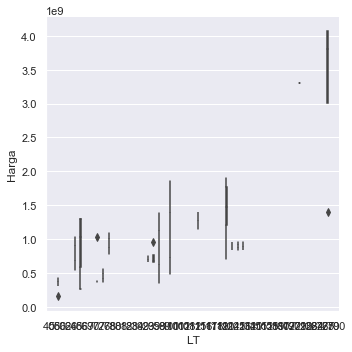

In [95]:
p = sns.catplot(x="LT", y="Harga", hue="LT", kind="box", data=bandung2)

# Insight :

- Tidak ditemukan data duplikat pada data bandung.csv
- Terdapat kecenderungan perbedaan harga rumah akibat dari tipe luas tanah, semakin besar luas tanah maka semakin mahal harga rumah tersebut
- Terdapat outlier pada tiga data tersebut
- Data tersebut tidak berdistribusi normal karena terdapat outlier
- Tidak ada missing value pada data tersebut 
- Dari 100 data tersebut ditemukan Nilai minimal, nilai maksimal, dan mean dari setiap: Harga, LT,LB,KT,KM,KTP,KMP,CARPORT, GARASI, DAN LISTRIK.
- Dari 100 data ditemukan data yang paling banyak adalah rumah dengan luas banngunan 42,45,50,67,150,350
- Dari sampel yang kita ambil ternyata rumah yang dijual lebih banyak yang memiliki SHM di kota Bandung

untuk itu, kami merekomendasikan untuk membeli rumah dengan luas bangunan 42,45,50,67,150,350 supaya lebih mudah saat kita mencari dan akan mendapatkan lebih banyak rekomendasi iklan rumah yang dijual di kota Bandung.
Kami juga merekomendasikan untuk pembeli yang mencari rumah dengan SHM di Kota Bandung